<a href="https://colab.research.google.com/github/Ramyanee/cats-dogs/blob/main/cats_vs_dogs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-06-07 19:56:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  84.2MB/s    in 0.8s    

2021-06-07 19:56:06 (84.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!unzip /tmp/cats_and_dogs_filtered.zip

Archive:  /tmp/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_filtered/train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)


validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_filtered/validation',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras.optimizers import RMSprop

In [10]:
def create_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150,150,3)),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')

  ])

  

  return model

In [11]:
model = create_model()

In [12]:
model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=0.001),
                metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
history =  model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data = validation_generator,
    validation_steps=50,
    verbose=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 58s - loss: 0.7985 - acc: 0.5610 - val_loss: 0.6513 - val_acc: 0.5500
Epoch 2/15
100/100 - 56s - loss: 0.6345 - acc: 0.6480 - val_loss: 0.6380 - val_acc: 0.6580
Epoch 3/15
100/100 - 56s - loss: 0.5554 - acc: 0.7315 - val_loss: 0.6501 - val_acc: 0.6300
Epoch 4/15
100/100 - 57s - loss: 0.4981 - acc: 0.7650 - val_loss: 0.6568 - val_acc: 0.6560
Epoch 5/15
100/100 - 57s - loss: 0.3972 - acc: 0.8050 - val_loss: 0.7192 - val_acc: 0.6740
Epoch 6/15
100/100 - 57s - loss: 0.3099 - acc: 0.8695 - val_loss: 0.6750 - val_acc: 0.7030
Epoch 7/15
100/100 - 57s - loss: 0.2295 - acc: 0.9030 - val_loss: 0.7190 - val_acc: 0.7240
Epoch 8/15
100/100 - 57s - loss: 0.1591 - acc: 0.9360 - val_loss: 0.9026 - val_acc: 0.7140
Epoch 9/15
100/100 - 57s - loss: 0.1100 - acc: 0.9560 - val_loss: 1.1705 - val_acc: 0.7230
Epoch 10/15
100/100 - 57s - loss: 0.0779 - acc: 0.9725 - val_loss: 1.2743 - val_acc: 0.7260
Epoch 11/15
100/100 - 56s - loss: 0.0699 - acc: 0.9740 - val_loss: 1.2968 - val_acc: 0.71

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images= np.vstack([x])
  classes= model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
[1.]
1.jpg is a dog
[1.]
2.jpg is a dog
[1.]
3.jpg is a dog
[1.]
4.jpg is a dog
[5.564489e-20]
10.jpg is a cat
[0.]
11.jpg is a cat
[1.]
12.jpg is a dog
[1.]
13.jpg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


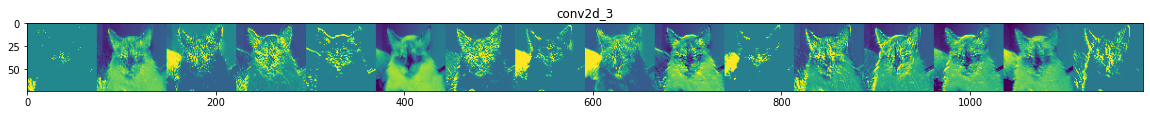

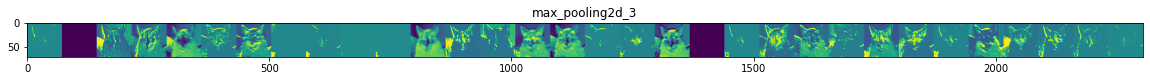

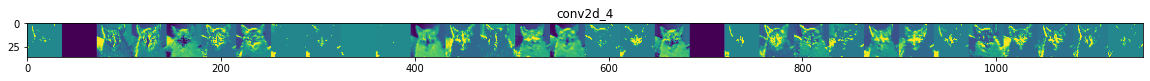

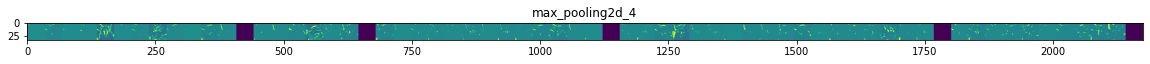

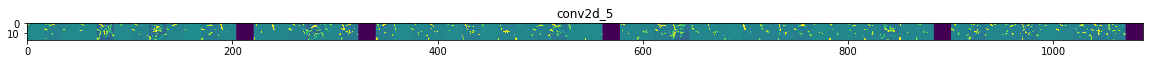

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 